### TAREA 12

__Ejercicio 1:__ Implementar método implicito de Euler

In [1]:
function met_euler(f,xo,to,tf,h) #Condiciones función
    listx = [xo]
    listxf=[xo]
    listt=linspace(to,tf,(tf-to)/h) #Rango para los valores de t
    for i in 1:length(listt)-1 
       
    xo=xo+h*f((xo),listt[i+1]) #fórmula del método de Euler
        xo=xo-((-2.5*xo)/-2.5)
push!(listx,xo)
    return listx

    end
   
end

met_euler (generic function with 1 method)

In [2]:
f(x,t)=-2.5x 

f (generic function with 1 method)

In [3]:

h0=met_euler(f,1.0,0.0,8.0,0.0001)

2-element Array{Float64,1}:
 1.0
 0.0

__Ejercicio 2:__ Implementar Euler: Regla del punto medio.

Aquí usaremos la siguiente fórmula:

$$x_{n+1}=x_n+hf\left(x_n+\frac{h}{2}f(x_n,t_n),t_{n}+\frac{h}{2}\right).$$

In [93]:
function medio_euler(f,xo,to,tf,h) #Condiciones función
    listx = [xo]
    listt=linspace(to,tf,(tf-to)/h)#Rango para los valores de t
    for i in 1:length(listt)-1
    xo=xo+h*f(xo+(h/2)*f((xo),listt[i]),listt[i]+(h/2))  #fórmula de la regla del punto medio
        push!(listx,xo) #llenado de la lista de las x con los valores obtenidos con el método iterativo
    end
    return listx 
end

medio_euler (generic function with 1 method)

In [94]:
 f(x,t)=-2.5x  #ecuación diferencial para ver como funciona.

f (generic function with 1 method)

In [95]:
h0=medio_euler(f,1.0,0.0,8.0,0.2);

In [96]:
function met_euler(f,xo,to,tf,h) #Condiciones función
    listx = [xo]
    listt=linspace(to,tf,(tf-to)/h) #Rango para los valores de t
    for i in 1:length(listt)-1 
    xo=xo+h*f((xo),listt[i])  #fórmula del método de Euler
        push!(listx,xo) #llenado de la lista de las x con los valores obtenidos con el método iterativo
    end
    return listx 
end

met_euler (generic function with 1 method)

In [97]:
listt=linspace(0,8,8/0.2) #intervalo de tiempo

0.0:0.20512820512820512:8.0

In [98]:
h1=met_euler(f,1.0,0.0,8.0,0.2);

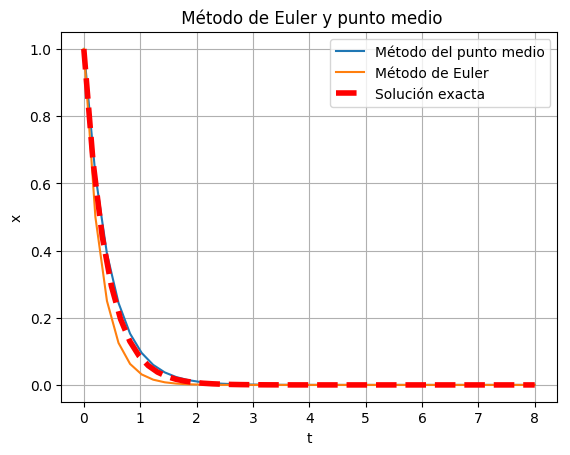

In [99]:
plot(listt,h0,label=("Método del punto medio"))
plot(listt,h1,label=("Método de Euler"))
t = linspace(0.0,8.0); x = exp.(-2.5*t)
plot(t, x, color="red", linewidth=4.0, linestyle="--",label=("Solución exacta"))
    legend()
 xlabel("t")
    ylabel("x")
    title(" Método de Euler y punto medio")
    grid("on")
show(); 

Notemos que al graficar la solución exacta (punteada roja), la solución númerica del método del punto medio (azul) y la del método de Euler normal, la regla del punto medio es mejor que la de Euler ambas bajo una elección de $h=0.2$

In [11]:
using PyPlot

__Ejercicio 3:__ Implementar método de Runge-Kutta de orden 4.

Usaremos las siguientes fórmulas para implementar el método
$$ x_{n+1}=x_n+\frac{h}{6}\left( k_1+2 k_2+2 k_3 +k_4 \right),$$
donde:
\begin{align*}
k_1&=f(t_n,x_n),\\
k_2&=f(t_{n}+\frac{h}{2},x_n+\frac{h}{2}k_1),\\
k_3&=f(t_{n+}+\frac{h}{2},x_n+\frac{h}{2}k_2),\\
k_4&=f(t_n+h,x_n+h k_3).\\
\end{align*}

In [12]:
function runge_kutta(f,xo,to,tf,h) #Condiciones de la función
    listx = [xo]
    listt=linspace(to,tf,(tf-to)/h)#Rango para los valores de t
    y=xo
    for i in 1:length(listt)-1 #ciclo for para el llenado de las relaciones del método de Runge_Kutta orden 4
        k1=f(y,listt[i])  
        k2=f(y+(h/2)*k1,listt[i]+(h/2))
        k3=f(y+(h/2)*k2,listt[i]+(h/2))
        k4=f(y+h*k3,listt[i]+h)
        y=y+(h/6)*(k1+2k2+2k3+k4)
        push!(listx,y) #llenado de la lista de las x con los valores obtenidos con el método iterativo
    end
    return listx 
end

runge_kutta (generic function with 1 method)

In [13]:
f(x,t)=-2.5x  #ecuación diferencial de prueba pues servirá para el siguiente ejercicio 

f (generic function with 1 method)

In [14]:
h1=runge_kutta(f,1.0,0.0,8.0,0.2);

__Ejercicio 4:__ Repita el ejercicio 1 del notebook anterior (Julia_6) y discuta los resultados respecto a lo que obtuvo con el método implícito. __Nota: Este es el test para el método de Euler implícito.__

Aplicamos el método de Runge-Kutta para loss cuatro valores de $h=1,0.5,0.2,0.01$ para la ecuación $$\frac{dx}{dt}=-\alpha x, x(0)=1\text{ y }2, \text{ y } t\in(0,8).$$

In [15]:
h0=runge_kutta(f,1.0,0.0,8.0,1.0); #condiciones iniciales
h1=runge_kutta(f,1.0,0.0,8.0,0.5);
h2=runge_kutta(f,1.0,0.0,8.0,0.2);
h3=runge_kutta(f,1.0,0.0,8.0,0.01);

In [16]:
 listt0=linspace(0.0,8.0,8.0);
 listt1=linspace(0.0,8.0,8.0/0.5);
 listt2=linspace(0.0,8.0,8.0/0.2);
 listt3=linspace(0.0,8.0,8.0/0.01);

In [17]:
using PyPlot


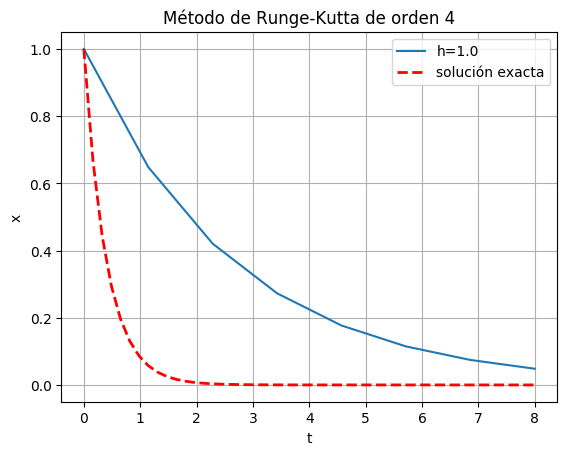

In [18]:
plot(listt0,h0,label=("h=1.0"))
t = linspace(0.0,8.0); x = exp.(-2.5*t)
plot(t, x, color="red", linewidth=2.0, linestyle="--",label=("solución exacta"))
    legend()
 xlabel("t")
    ylabel("x")
    title("Método de Runge-Kutta de orden 4")
    grid("on")
show(); 

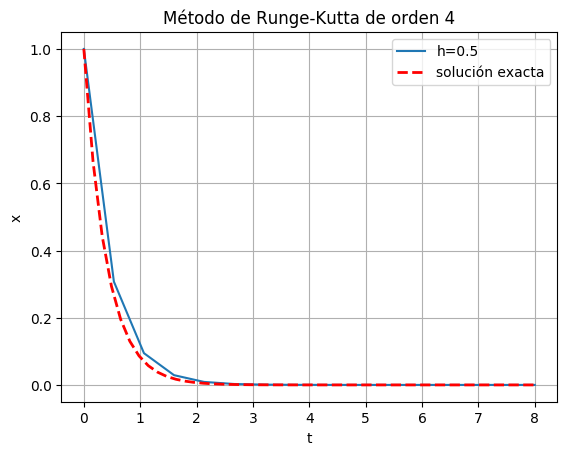

In [19]:
plot(listt1,h1,label=("h=0.5"))
t = linspace(0.0,8.0); x = exp.(-2.5*t)
plot(t, x, color="red", linewidth=2.0, linestyle="--",label=("solución exacta"))
    legend()
 xlabel("t")
    ylabel("x")
    title("Método de Runge-Kutta de orden 4")
    grid("on")
show(); 

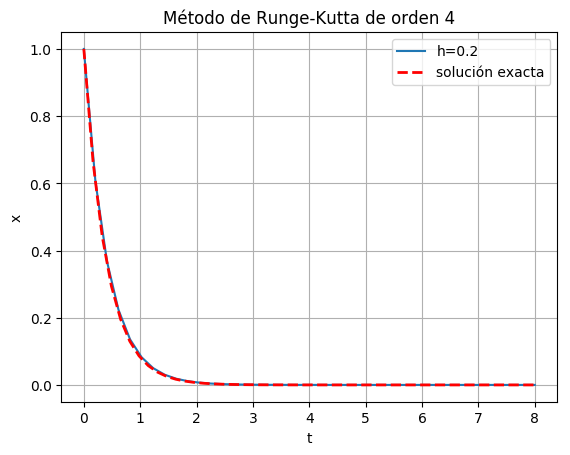

In [20]:
plot(listt2,h2,label=("h=0.2"))
t = linspace(0.0,8.0); x = exp.(-2.5*t)
plot(t, x, color="red", linewidth=2.0, linestyle="--",label=("solución exacta"))
    legend()
 xlabel("t")
    ylabel("x")
    title("Método de Runge-Kutta de orden 4")
    grid("on")
show(); 

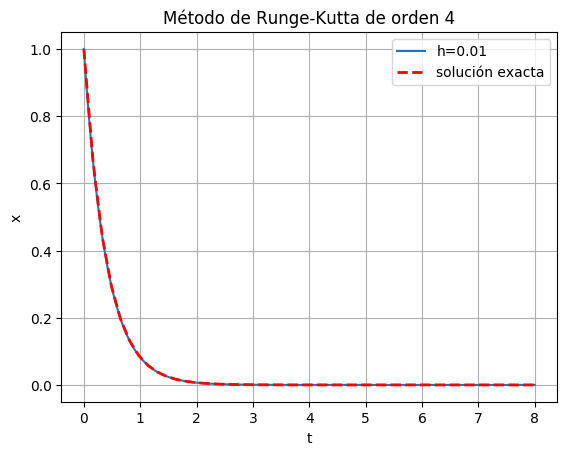

In [21]:
plot(listt3,h3,label=("h=0.01"))
t = linspace(0.0,8.0); x = exp.(-2.5*t)
plot(t, x, color="red", linewidth=2.0, linestyle="--",label=("solución exacta"))
    legend()
 xlabel("t")
    ylabel("x")
    title("Método de Runge-Kutta de orden 4")
    grid("on")
show(); 

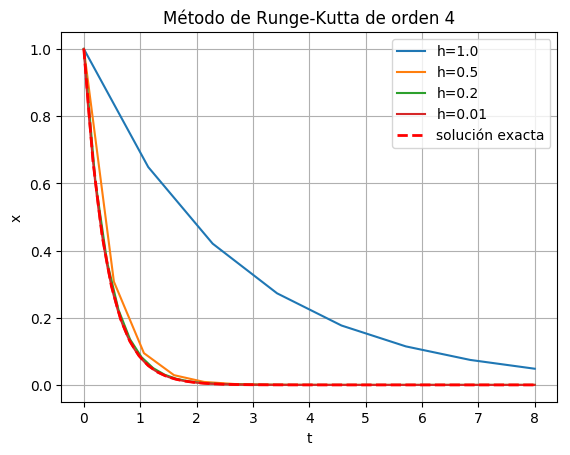

In [22]:
plot(listt0,h0,label=("h=1.0"))
plot(listt1,h1,label=("h=0.5"))
plot(listt2,h2,label=("h=0.2"))
plot(listt3,h3,label=("h=0.01"))
t = linspace(0.0,8.0); x = exp.(-2.5*t)
plot(t, x, color="red", linewidth=2.0, linestyle="--",label=("solución exacta"))
    legend()
 xlabel("t")
    ylabel("x")
    title("Método de Runge-Kutta de orden 4")
    grid("on")
show(); 

Notamos que bajo el método de Runge-Kutta las soluciones númericas convergen de forma más rápida a la solución exacta pues en el método de Euler para el caso de $h=1.0$ se tenía una solución no estable.

__Ejercicio 5__: Usar el método del punto medio y de Runge-Kutta para resolver la ecuación:
$$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$
Compare su respuesta con la solución exacta: $4+8t-5t^2$. notén que $x(0)=4$.

### método del punto medio

In [23]:
f(x,t)=(2x-18t)/(1+t)

f (generic function with 1 method)

In [24]:
function medio_euler(f,xo,to,tf,h) #Condiciones función
    listx = [xo]
    listt=linspace(to,tf,(tf-to)/h)#Rango para los valores de t
    for i in 1:length(listt)-1
    xo=xo+h*f(xo+(h/2)*f((xo),listt[i]),listt[i]+(h/2))  #fórmula de la regla del punto medio
        push!(listx,xo) #llenado de la lista de las x con los valores obtenidos con el método iterativo
    end
    return listx 
end

medio_euler (generic function with 1 method)

In [25]:
h0=medio_euler(f,4.0,0.0,8.0,0.2); #usando el código del ejercicio dos de la presente tarea y la condición inicial x(0)=4.

In [26]:
listt=linspace(0.0,8.0,8.0/0.2);

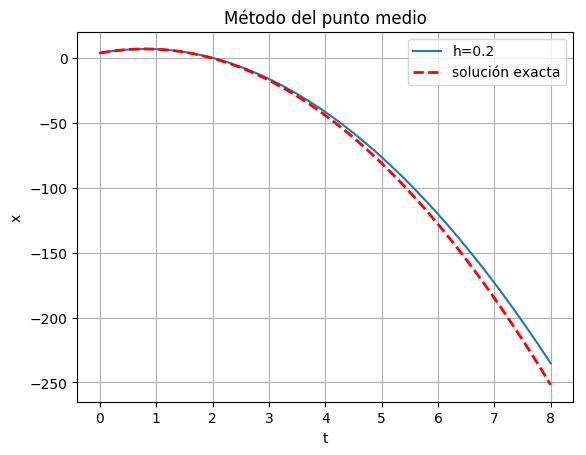

In [27]:
plot(listt,h0,label=("h=0.2"))
t = linspace(0.0,8.0); x = 4+8t-5t.^2
plot(t, x, color="red", linewidth=2.0, linestyle="--",label=("solución exacta"))
    legend()
 xlabel("t")
    ylabel("x")
    title("Método del punto medio")
    grid("on")
show(); 

### Runge-Kutta orden 4

In [28]:
f(x,t)=(2x-18t)/(1+t)

f (generic function with 1 method)

In [29]:
function runge_kutta(f,xo,to,tf,h) #Condiciones de la función
    listx = [xo]
    listt=linspace(to,tf,(tf-to)/h)#Rango para los valores de t
    y=xo
    for i in 1:length(listt)-1 #ciclo for para el llenado de las relaciones del método de Runge_Kutta orden 4
        k1=f(y,listt[i])  
        k2=f(y+(h/2)*k1,listt[i]+(h/2))
        k3=f(y+(h/2)*k2,listt[i]+(h/2))
        k4=f(y+h*k3,listt[i]+h)
        y=y+(h/6)*(k1+2k2+2k3+k4)
        push!(listx,y) #llenado de la lista de las x con los valores obtenidos con el método iterativo
    end
    return listx 
end

runge_kutta (generic function with 1 method)

In [30]:
h1=runge_kutta(f,4.0,0.0,8.0,0.2);

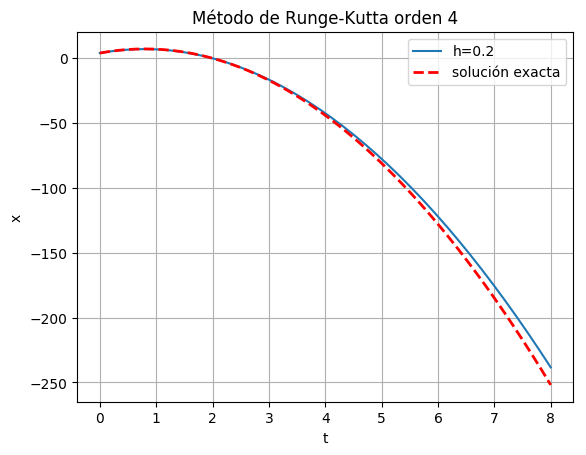

In [31]:
plot(listt,h1,label=("h=0.2"))
t = linspace(0.0,8.0); x = 4+8t-5t.^2
plot(t, x, color="red", linewidth=2.0, linestyle="--",label=("solución exacta"))
    legend()
 xlabel("t")
    ylabel("x")
    title("Método de Runge-Kutta orden 4")
    grid("on")
show(); 

Ahora vamos a gráficar las dos soluciones de ambos métodos con la exacta. 


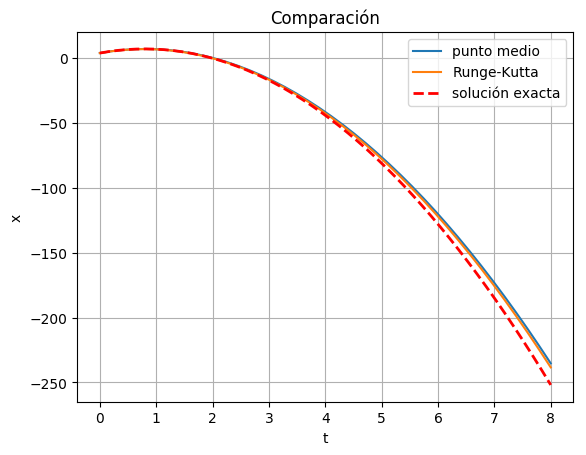

In [32]:
plot(listt,h0,label=("punto medio"))
plot(listt,h1,label=("Runge-Kutta"))
t = linspace(0.0,8.0); x = 4+8t-5t.^2
plot(t, x, color="red", linewidth=2.0, linestyle="--",label=("solución exacta"))
    legend()
 xlabel("t")
    ylabel("x")
    title("Comparación")
    grid("on")
show(); 

Donde observamos que Runge-Kutta es mejor método que punto medio pues se acerca un poco mas a la gráfica de la solución exacta.

__Ejercicio 6__: Grafique la energía total del oscilador harmonico usando los métodos explícito de Euler y Runge-Kutta de orden 4. Compare sus respuestas y discuta.

Ahora como la energia total del oscilador es la cinética más la potencial como se tiene: 
$$E= \frac{1}{2}mv^{2}+\frac{1}{2}kx^{2}$$

Supongamos que k y m son la unidad

### Método de Runge-Kutta

In [56]:
function runge(f,list,x0) #usamos el código del  método de Euler independiente de la dimensión.
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
         t = i*h
        k1=f(x,t)  
        k2=f(x+(h/2)*k1,t+(h/2))
        k3=f(x+(h/2)*k2,t+(h/2))
        k4=f(x+h*k3,t+h)
        x=x+(h/6)*(k1+2k2+2k3+k4)
    
        push!(listx,x) 
     end
     return listx
end

runge (generic function with 1 method)

In [71]:
f(x,t)=[x[2], -1.0*x[1]]

f (generic function with 1 method)

In [77]:
list=0:0.01:100; 
vector=runge(f,list,[0,1]);
listx10r=map(x->x[1],vector);
listx20r=map(x->x[2],vector);

In [78]:
function E(x,y)
    return (x^2)/2+(y^2)/2 #creamos la función para la energía total, haciendo todas las constantes iguales a 1
end 

E (generic function with 1 method)

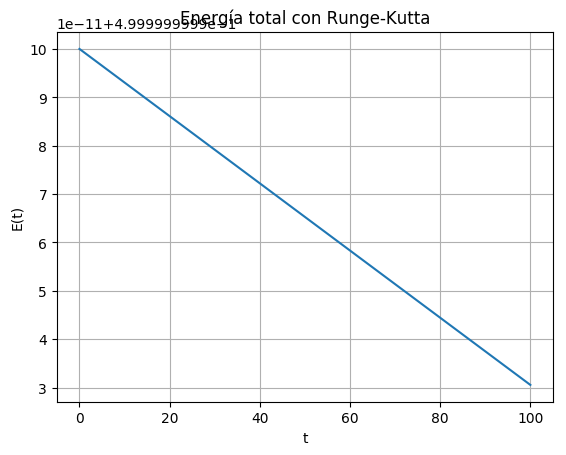

In [83]:
plot(list,E.(listx10r,listx20r))

legend()
 xlabel("t")
    ylabel("E(t)")
    title("Energía total con Runge-Kutta")
    grid("on")
show(); 

### Euler

In [80]:
list=0:0.01:100; 
vector=euler(f,list,[0,1]);
listx10e=map(x->x[1],vector);
listx20e=map(x->x[2],vector);

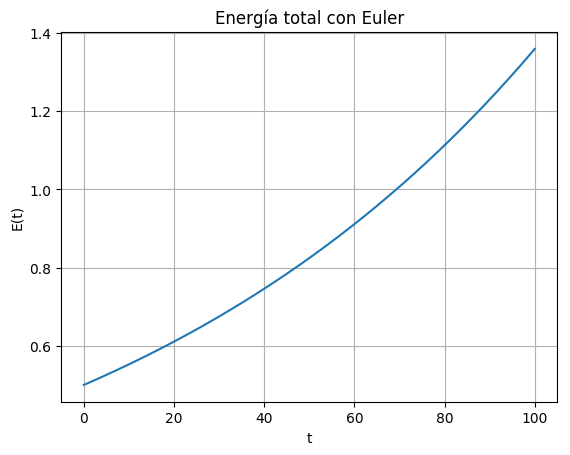

In [82]:
plot(list,E.(listx10e,listx20e))

legend()
 xlabel("t")
    ylabel("E(t)")
    title("Energía total con Euler")
    grid("on")
show(); 

Aunque parezcan raras las gráficas de la energía total, pues la teoría nos dice que en este caso del oscilador armónico la energía será una constante del tiempo, no parece ser cte. pero notemos que la escala de ambas gráficas en el eje de las ordenadas es muy pequeña comparándola con las abscisas y aún más pequeña es la de la gráfica del Runge-Kutta que donde se aplicó Euler. Por tanto ambas gráficas sí tienden a constantes pues su pendiente es pequeña.

__Ejercicio 7:__ Utilizando los métodos de Euler y Runge-Kutta con $h=0.01$ y una condición inicial, grafique las dos trayectorias en el espacio $(x,v)$ (esto casi es el espacio de fase en la mécanica clásica, para ello se necesitaria graficar $(x,p)$. 

### Runge-Kutta

In [87]:
list=0:0.01:100; #aquí es donde ponemos el h igual a 0.01
vector=runge(f,list,[0,1]);

In [88]:
listx1r=map(x->x[1],vector);
listx2r=map(x->x[2],vector);

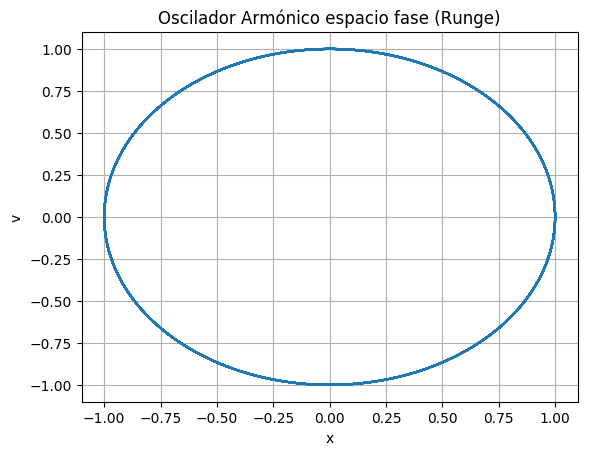

In [89]:
plot(listx1r,listx2r)

legend()
 xlabel("x")
    ylabel("v")
    title("Oscilador Armónico espacio fase (Runge)")
    grid("on")
show(); 

 ### Euler

In [84]:
list=0:0.01:100;
vector=euler(f,list,[0,1]);

In [85]:
listx1e=map(x->x[1],vector); #nos dan los valores de la la posición y la velocidad. 
listx2e=map(x->x[2],vector);

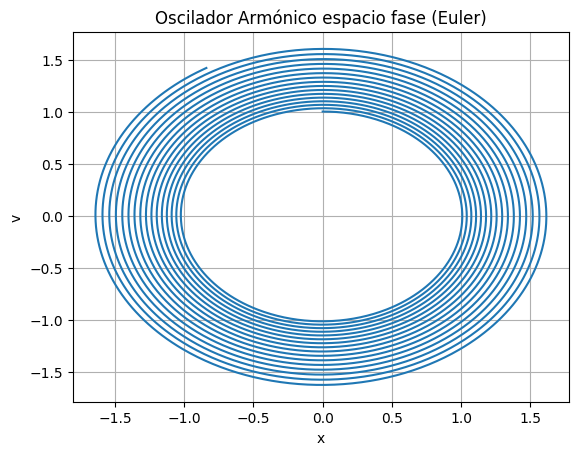

In [86]:
plot(listx1e,listx2e)

legend()
 xlabel("x")
    ylabel("v")
    title("Oscilador Armónico espacio fase (Euler)")
    grid("on")
show(); 

Observamos que bajo el metodo de Runge-Kutta la trayectoria en el espacio fase es cerrada y para el método de Euler es abierta.

__Ejercicio 8:__ Utilizando solo Runge-Kutta, grafique muchas condiciones iniciales del oscilador armónico en el espacio de fase. Tome todos los parámetros como prefiera, revisando que obtiene el resultado esperado.

In [45]:
list=0:0.01:10; 
vector=runge(f,list,[0,1]);
listx10r=map(x->x[1],vector); #nos dan los valores de la la posición y la velocidad. 
listx20r=map(x->x[2],vector);

In [46]:
list=0:0.01:10; #aquí es donde ponemos el h igual a 0.01
vector=runge(f,list,[4,5]);
listx11r=map(x->x[1],vector); #nos dan los valores de la la posición y la velocidad. 
listx21r=map(x->x[2],vector);

In [47]:
list=0:0.01:10; 
vector=runge(f,list,[6,8]);
listx12r=map(x->x[1],vector); #nos dan los valores de la la posición y la velocidad. 
listx22r=map(x->x[2],vector);

In [48]:
list=0:0.01:10; 
vector=runge(f,list,[0.5,2]);
listx13r=map(x->x[1],vector); #nos dan los valores de la la posición y la velocidad. 
listx23r=map(x->x[2],vector);

In [49]:
list=0:0.01:10; 
vector=runge(f,list,[12,16]);
listx14r=map(x->x[1],vector); #nos dan los valores de la la posición y la velocidad. 
listx24r=map(x->x[2],vector);

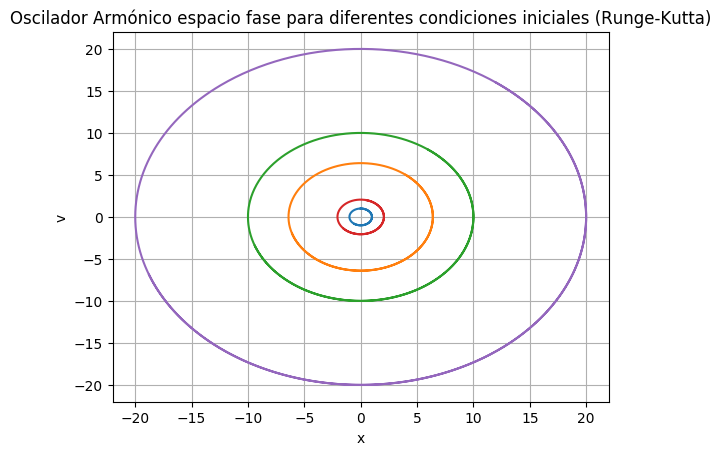

In [50]:
plot(listx10r,listx20r)
plot(listx11r,listx21r)
plot(listx12r,listx22r)
plot(listx13r,listx23r)
plot(listx14r,listx24r)
legend()
 xlabel("x")
    ylabel("v")
    title("Oscilador Armónico espacio fase para diferentes condiciones iniciales (Runge-Kutta)")
    grid("on")
show(); 